In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import DecisionBoundaryDisplay

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

# Практическое задание 6

## В этом задании вам предстоит использовать данные о выживаемости на Титанике для построения модели бинарной классификации для признака Survived.

### Считайте датасет из файла train.csv (это данные о выживаемости на Титанике)

In [3]:
%%time
df = pd.read_csv('train.csv')

CPU times: user 5.89 ms, sys: 1.13 ms, total: 7.02 ms
Wall time: 6.12 ms


### Выберите и обоснуйте метрику для измерения качества (accuracy/precision/recall/f1-score/fbeta-score/roc-auc и т.д.). В рамках данного пункта необходимо подобрать наиболее релевантную метрику или набор метрик для вашей задачи, написав краткое обоснование (1-2 предложения) - 2 балла

Решаемая задача относится к бинарной классификации. Для таких задач годятся метрики accuracy, precision, recall, F1-мера (комбинация precision и recall). Метрика accuracy (точность) может давать некорректные оценки, когда объектов одного класса сильно больше, чем другого, но это не наш случай, так как процент выживаемости по всему кораблю составил порядка 30%. Поэтому будем использовать все указанные метрики.  

### Предобработка данных

In [4]:
df = df.drop(columns = ['Name', 'Ticket', 'Cabin', 'Embarked'])

In [5]:
ohe = OneHotEncoder()
res = ohe.fit_transform(df['Sex'].to_numpy().reshape(-1, 1))
ohe_df = pd.DataFrame(res.toarray(), columns=ohe.get_feature_names_out())
res = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
data = pd.concat([df, res], axis=1).drop(columns = ['Sex']).dropna() 
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


#### Проверка на мультиколлинеарность: все ОК

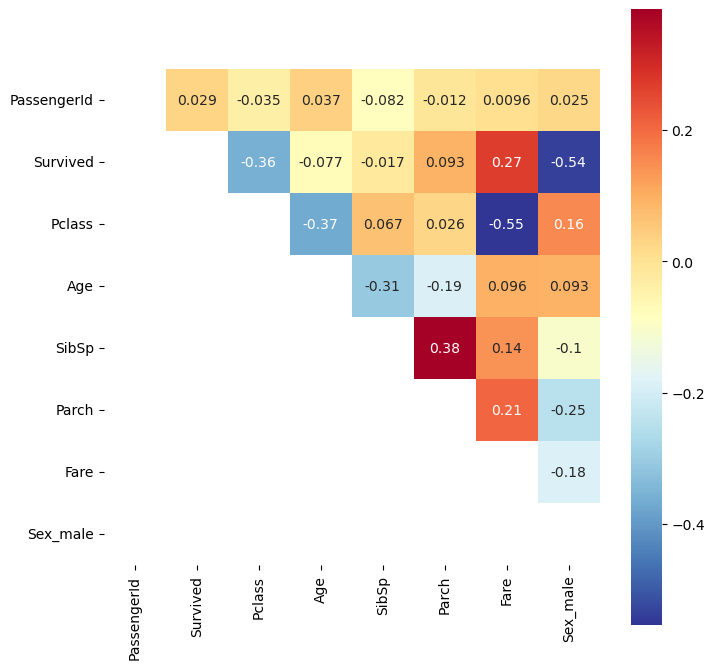

In [6]:
corrs = data.corr()
upper_tri = corrs.where(np.triu(np.ones(corrs.shape), k=1).astype(bool))
plt.figure(figsize=(8, 8))
sns.heatmap(upper_tri, cmap="RdYlBu_r", square=True, annot=True);

### Произведено разбиение датасета на тренировочную/тестовую выборки - 1 балл


In [7]:
y = data["Survived"] 
X = data.drop(columns = ['Survived']) 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2024, test_size=0.25) 

### Произведено измерение качества константного предсказания (например, наиболее частотный класс/случайное предсказание) - 1 балл

In [8]:
dummy_clf = DummyClassifier(strategy="most_frequent") 
dummy_clf.fit(X_train, y_train);

### ML-модель обучена на тренировочной выборке, учтены особенности предобработки данных для модели, если они есть - 3 балла

In [9]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train);

/home/elobanova/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Произведено измерение качества на отложенной выборке с использованием ранее выбранной метрики - 1 балл

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [11]:
y_pred_dummy = dummy_clf.predict(X_test) 
y_pred_log_reg = log_reg.predict(X_test) 
print(f'Accuracy for Dummy Classificator: {accuracy_score(y_test, y_pred_dummy)}')
print(f'Accuracy for Logistic regression: {accuracy_score(y_test, y_pred_log_reg)}')

Accuracy for Dummy Classificator: 0.6089385474860335
Accuracy for Logistic regression: 0.770949720670391


In [12]:
print(f'Precision for Dummy Classificator: {precision_score(y_test, y_pred_dummy, zero_division=0)}')
print(f'Precision for Logistic regression: {precision_score(y_test, y_pred_log_reg, zero_division=0)}')

Precision for Dummy Classificator: 0.0
Precision for Logistic regression: 0.7230769230769231


In [13]:
print(f'Recall for Dummy Classificator: {recall_score(y_test, y_pred_dummy)}')
print(f'Recall for Logistic regression: {recall_score(y_test, y_pred_log_reg)}')

Recall for Dummy Classificator: 0.0
Recall for Logistic regression: 0.6714285714285714


In [14]:
print(f'F1-score for Dummy Classificator: {f1_score(y_test, y_pred_dummy)}')
print(f'F1-score for Logistic regression: {f1_score(y_test, y_pred_log_reg)}')

F1-score for Dummy Classificator: 0.0
F1-score for Logistic regression: 0.6962962962962963


### Обеспечена воспроизводимость решения: зафиксированы random_state, ноутбук воспроизводится от начала до конца без ошибок - 2 балла